## Cross Validation

In [153]:
from sklearn.model_selection import cross_validate
X = data.loc[:, ~data.columns.isin(['TARGET'])]
cv_results = cross_validate(lr, X, y, cv=10,return_train_score=False)

In [154]:
cv_results['test_score']

array([0.9550992 , 0.95475113, 0.95744866, 0.95544727, 0.95475113,
       0.95857988, 0.95466411, 0.95570446, 0.95709686, 0.95561744])

# Word Embeddings (word2vec Introduction)

## Continuous Bag of Words (Use Context to Predict Target Word)
![alt text](images/word2vec_cbow.png "Logo Title Text 1")

## Softmax
![alt text](images/softmax.png "Logo Title Text 1")

## Skipgram
![alt text](images/skipgram.png "Logo Title Text 1")

## Softmax
![alt text](images/wordembedding_cluster.png "Logo Title Text 1")

In [42]:
import en_core_web_sm
import spacy
from scipy.spatial.distance import cosine
nlp = en_core_web_sm.load()

In [43]:
tokens = nlp(u'dog cat Beijing sad depressed couch sofa canine China Chinese France Paris banana')

for token1 in tokens:
    for token2 in tokens:
        if token1 != token2:
            print(f" {token1} - {token2}: {1 - cosine(token1.vector, token2.vector)}")

 dog - cat: 0.4564264118671417
 dog - Beijing: 0.1571345329284668
 dog - sad: 0.3079860210418701
 dog - depressed: 0.11385080963373184
 dog - couch: 0.5404482483863831
 dog - sofa: 0.33240464329719543
 dog - canine: 0.4633784294128418
 dog - China: 0.0019485866650938988
 dog - Chinese: 0.021737948060035706
 dog - France: 0.1857185661792755
 dog - Paris: 0.11601343750953674
 dog - banana: 0.3103766441345215
 cat - dog: 0.4564264118671417
 cat - Beijing: 0.25583046674728394
 cat - sad: 0.06742441654205322
 cat - depressed: 0.11650095880031586
 cat - couch: 0.37735462188720703
 cat - sofa: 0.414833128452301
 cat - canine: 0.45437631011009216
 cat - China: 0.14348067343235016
 cat - Chinese: 0.03203266113996506
 cat - France: 0.26350462436676025
 cat - Paris: 0.1825326830148697
 cat - banana: 0.4973468482494354
 Beijing - dog: 0.1571345329284668
 Beijing - cat: 0.25583046674728394
 Beijing - sad: 0.16756749153137207
 Beijing - depressed: 0.020596839487552643
 Beijing - couch: 0.17647489905

# Finding Most Similar Words (Using Our Old Methods)

In [60]:
# inspect the default settings for CountVectorizer
CountVectorizer()

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [62]:
reviews = open("poor_amazon_toy_reviews.txt").readlines()
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 1), 
                             stop_words="english", 
                             max_features=500,token_pattern='(?u)\\b[a-zA-Z][a-zA-Z]+\\b')
X = vectorizer.fit_transform(reviews)

data = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
data.head()

,able,absolutely,actual,actually,adult,advertised,ago,air,amazon,apart,...,working,works,worse,worst,worth,wouldn,wrong,year,years,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
from sklearn.metrics.pairwise import cosine_similarity

# create similiarity matrix
similarity_matrix = pd.DataFrame(cosine_similarity(data.T.values), 
             columns=vectorizer.get_feature_names(),
                                 index=vectorizer.get_feature_names())

In [90]:
# unstack matrix into table
similarity_table = similarity_matrix.rename_axis(None).rename_axis(None, axis=1).stack().reset_index()

In [91]:
# rename columns
similarity_table.columns = ["word1", "word2", "similarity"]
similarity_table.shape

(250000, 3)

In [95]:
similarity_table = similarity_table[similarity_table["similarity"] < 0.99]
similarity_table.shape

(249500, 3)

In [116]:
similarity_table.sort_values(by="similarity", ascending=False).drop_duplicates(
    subset="similarity", keep="first").head(10)

,word1,word2,similarity
144497,old,year,0.754569
194593,service,customer,0.734095
237276,waste,money,0.655483
245419,working,stopped,0.589414
74650,figure,figures,0.553856
5949,arm,train,0.500379
172826,quality,poor,0.469081
179083,remote,control,0.456930
210121,store,dollar,0.426935
4648,apart,fell,0.385922


In [101]:
top_500_words = vectorizer.get_feature_names()

### An Aside: Named Entity Recognition With Spacy

In [120]:
doc = nlp(u"Steve Jobs and Apple is looking at buying U.K. startup for $1 billion")

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Steve Jobs 0 10 PERSON
Apple 15 20 ORG
U.K. 42 46 GPE
$1 billion 59 69 MONEY


# Exercise: Similar Words Using Word Embeddings

In [103]:
# load into spacy your top 500 words

tokens = nlp(f'{" ".join(top_500_words)}')

In [112]:
from itertools import product
# create a list of similarity tuples

similarity_tuples = []

for token1, token2 in product(tokens, repeat=2):
    similarity_tuples.append((token1, token2, token1.similarity(token2)))

similarities = pd.DataFrame(similarity_tuples, columns=["word1","word2", "score"])


In [114]:
# find similar words
similarities[similarities["score"] < 1].sort_values(
    by="score", ascending=False).drop_duplicates(
    subset="score", keep="first")

,word1,word2,score
108082,inches,figures,0.833207
76607,figures,packs,0.825721
211253,stop,start,0.816715
48523,damaged,popped,0.812956
108233,inches,packs,0.812329
32093,charged,used,0.811088
158221,pictured,cracked,0.810884
227883,tried,wasted,0.809038
227873,tried,used,0.806167
112469,items,balloons,0.804584


# Distributions

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


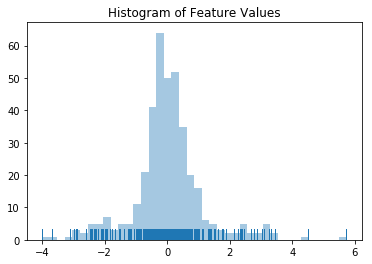

In [35]:
%matplotlib inline
import seaborn as sns
import numpy as np

vector = nlp(u'banana').vector

ax = sns.distplot(vector, kde=False, rug=True)
t = ax.set_title('Histogram of Feature Values')

## Optimization Techniques

### Subsampling

What do we do with highly frequent words like `the` or `of`? We don't gain a ton of meaning from training on these words, and they become computationally expensive since they appear so frequently:

![alt text](images/subsampling.png "http://mccormickml.com/2017/01/11/word2vec-tutorial-part-2-negative-sampling/")
In the image above, $z(w_i)$ is the frequency of that particular word divided by the total number of words in the entire corpus. For instance, if a corpus of text has 50 words, and the word `dog` appears 3 times, $z(w_{dog}) = 0.06$.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


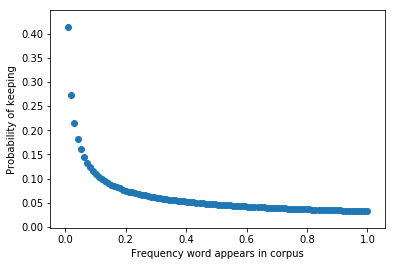

In [13]:
import numpy as np
# write subsampling function
def subsample(z):
    return ((z * 1000) ** 0.5 + 1) * (0.001 / z)

# plot this function:
import matplotlib.pyplot as plt

Z = list(np.linspace(0,1,100))
probability_of_keeping = list(map( lambda z: subsample(z), Z))

plt.scatter(Z, probability_of_keeping)
plt.xlabel("Frequency word appears in corpus")
plt.ylabel("Probability of keeping")
plt.show()

## Negative Sampling

If you have 50,000 words in your vocabulary, you need to make 2 x 50,000 updates to your model for each context word for each target word! This is an incredibly costly calculation. For the most part, we don't need to make frequent updates to the majority of the corpus. For instance, if our context word is `midterm` and our target word is `study`, do we really need to speed CPU time computing the gradients for `elephant`? 

In practice, we will only sample 4-5 negative samples (where the target output is 0).

## Limitations of Word Embeddings

#### How to handle **Out Of Vocabulary (OOV)** words?
Although **word2vec** and **FastText** include a significant vocabulary size, there will inevitably be words that are not included. For instance, if you are analyzing text conversations using word embeddings pretrained on Wikipedia text (which typically has more formal vocabulary than everyday language), how will you account for the following words?

- DM
- ROFLMAO
- bae
- 😃
- #10YearChallenge
- wut

#### Potential solution: use word embeddings if they are available, and otherwise initialize the weights to random.

```python
import numpy as np
def vectorize_word(input_word: str, D=50):
    """
    D: an integer that represents the length (dimensionality of the word embeddings)
    word_embeddings: A dictionary object with the string word as the key, and the embedding vector of 
    length D as the values.
    For instance, word_embeddings["cat"] will return [2.3, 4.5, 6.1, -2.2, ...]
    """
    if input_word in word_embeddings.keys():
        return word_embeddings[input_word]
    else:
        return np.random.rand(D)
```

##### Should we update the word embedding matrices during the model training step?
- Ideally, you'd only want to be able to update the specific weights that were randomly initialized (since the rest of the weights are by definition pre-trained and are already pretty good). However, most deep learning libraries do not allow you to easily select which specific weight elements to apply backpropagation to- you either update all weights or you update none. In practice, most data scientists will "freeze" the word embedding layer:

In Keras:
```python
word_embedding_layer.trainable = False # by default, trainable is set to true in Keras
```
In Tensorflow:
```python
import tensorflow as tf
N = 300 # number of words
D = 50 # of dimensions in embeddings
initial_word_embeddings = [0, 1, 2, 3, 4, 5, 6, 7]
tensor = tf.constant(initial_word_embeddings, shape=[N, D])
```

- Ambiguity around **Domain-specific words**: using a generic pre-trained word embedding will not capture the semantic meaning of the word **sack** when it is used in the context of American football:
![sack](images/football-bag-sack-diff.png)